# Managing Financial Data
In this notebook, we import financial data from several sources (files or from the web) and explore them further.

## Importing from csv files
---

In [1]:
# Import pandas library
import pandas as pd

# Import the data
nasdaq = pd.read_csv('nasdaq-listings.csv', na_values='NAN', parse_dates=['Last Update'])

# Display first 10 rows
print(nasdaq.head(5))

# Inspect nasdaq
nasdaq.info()

  Stock Symbol           Company Name  Last Sale  Market Capitalization  \
0         AAPL             Apple Inc.     141.05           7.400000e+11   
1        GOOGL          Alphabet Inc.     840.18           5.810000e+11   
2         GOOG          Alphabet Inc.     823.56           5.690000e+11   
3         MSFT  Microsoft Corporation      64.95           5.020000e+11   
4         AMZN       Amazon.com, Inc.     884.67           4.220000e+11   

   IPO Year             Sector  \
0    1980.0         Technology   
1       NaN         Technology   
2    2004.0         Technology   
3    1986.0         Technology   
4    1997.0  Consumer Services   

                                          Industry Last Update  
0                           Computer Manufacturing  2017-04-26  
1  Computer Software: Programming, Data Processing  2017-04-24  
2  Computer Software: Programming, Data Processing  2017-04-23  
3          Computer Software: Prepackaged Software  2017-04-26  
4                  

## Importing from Excel sheets
---
### Importing a single sheet

In [2]:
# Import the data
nyse = pd.read_excel('listings.xlsx', sheetname='nyse', na_values='n/a')

# Display the head of the data
print(nyse.head())

# Inspect the data
nyse.info()

  Stock Symbol            Company Name  Last Sale  Market Capitalization  \
0          DDD  3D Systems Corporation      14.48           1.647165e+09   
1          MMM              3M Company     188.65           1.127366e+11   
2         WBAI         500.com Limited      13.96           5.793129e+08   
3         WUBA             58.com Inc.      36.11           5.225238e+09   
4          AHC   A.H. Belo Corporation       6.20           1.347351e+08   

   IPO Year             Sector  \
0       NaN         Technology   
1       NaN        Health Care   
2    2013.0  Consumer Services   
3    2013.0         Technology   
4       NaN  Consumer Services   

                                          Industry  
0          Computer Software: Prepackaged Software  
1                       Medical/Dental Instruments  
2            Services-Misc. Amusement & Recreation  
3  Computer Software: Programming, Data Processing  
4                             Newspapers/Magazines  
<class 'pandas.core.

### Importing several sheets

In [3]:
# Create pd.ExcelFile() object
xls = pd.ExcelFile('listings.xlsx')

# Extract sheet names and store in exchanges
exchanges = xls.sheet_names

# Create listings dictionary with all sheet data
listings = pd.read_excel(xls, sheetname=exchanges, na_values='n/a')

# Inspect NASDAQ listings
listings['nasdaq'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 7 columns):
Stock Symbol             3167 non-null object
Company Name             3167 non-null object
Last Sale                3165 non-null float64
Market Capitalization    3167 non-null float64
IPO Year                 1386 non-null float64
Sector                   2767 non-null object
Industry                 2767 non-null object
dtypes: float64(3), object(4)
memory usage: 173.3+ KB


### Combining several excel sheets into one dataframe

In [4]:
# Create pd.ExcelFile() object
xls = pd.ExcelFile('listings.xlsx')

# Extract sheet names and store in exchanges
exchanges = xls.sheet_names

listings = []

for item in exchanges:
    listing = pd.read_excel(xls, sheetname=item, na_values='n/a')
    listing['Exchange'] = item
    listings.append(listing)

combined_listings = pd.concat(listings)

combined_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6674 entries, 0 to 3146
Data columns (total 8 columns):
Stock Symbol             6674 non-null object
Company Name             6674 non-null object
Last Sale                6590 non-null float64
Market Capitalization    6674 non-null float64
IPO Year                 2852 non-null float64
Sector                   5182 non-null object
Industry                 5182 non-null object
Exchange                 6674 non-null object
dtypes: float64(3), object(5)
memory usage: 469.3+ KB


## Importing from the web (DataReader)
---
### Importing using Yahoo as data source
Documentation on sources available using DataReader: click [here](http://pandas-datareader.readthedocs.io/en/latest/remote_data.html)

In [5]:
# Import DataReader
from pandas_datareader.data import DataReader

# Import date
from datetime import date

# Set start and end dates
start = date(2016,1,1)
end = date(2016,12,31)

# Set the ticker
ticker = 'AAPL'

# Set the data source
data_source = 'yahoo'

# Import the stock prices
stock_prices = DataReader(ticker, data_source, start, end)

# Display and inspect the result
print(stock_prices.head())
stock_prices.info()

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-12-31  107.010002  107.029999  104.820000  105.260002  101.339394   
2016-01-04  102.610001  105.370003  102.000000  105.349998  101.426033   
2016-01-05  105.750000  105.849998  102.410004  102.709999   98.884369   
2016-01-06  100.559998  102.370003   99.870003  100.699997   96.949242   
2016-01-07   98.680000  100.129997   96.430000   96.449997   92.857529   

              Volume  
Date                  
2015-12-31  40635300  
2016-01-04  67649400  
2016-01-05  55791000  
2016-01-06  68457400  
2016-01-07  81094400  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2015-12-31 to 2016-12-30
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Adj Close    253 non-null float64
Volume       253 non-null i

### Plotting the data

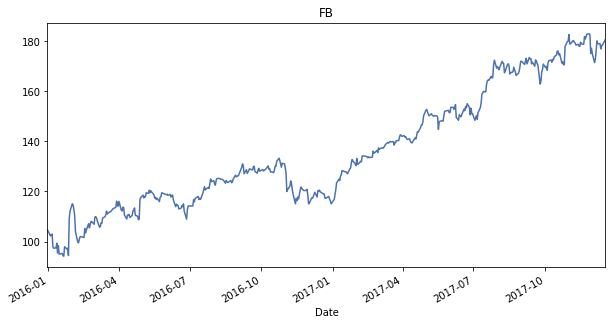

In [6]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

# Set start and end dates
start = date(2016,1,1)
end = date.today()

# Set the ticker and data_source
ticker = 'FB'
data_source = 'yahoo'

# Import the data using DataReader
stock_prices = DataReader(ticker, data_source, start, end)

# Plot Close
stock_prices['Close'].plot(title=ticker, figsize=(10,5))

# Show the plot
plt.show()

### Importing using FRED as data source
FRED = Federal Reserve Economic Data

Let's import the data for the 10-Year Treasury Constant Maturity Rate (DGS10).  See [here](https://fred.stlouisfed.org/series/DGS10)

In [7]:
# Import DataReader
from pandas_datareader.data import DataReader

# Import date
from datetime import date

# Set start and end dates
start = date(2016,1,1)
end = date(2016,12,31)

# Set the ticker
ticker = 'DGS10'

# Set the data source
data_source = 'fred'

# Import the stock prices
dgs10 = DataReader(ticker, data_source, start, end)

# Display and inspect the result
print(dgs10.head())
dgs10.info()

            DGS10
DATE             
2016-01-01    NaN
2016-01-04   2.24
2016-01-05   2.25
2016-01-06   2.18
2016-01-07   2.16
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2016-01-01 to 2016-12-30
Data columns (total 1 columns):
DGS10    250 non-null float64
dtypes: float64(1)
memory usage: 4.1 KB


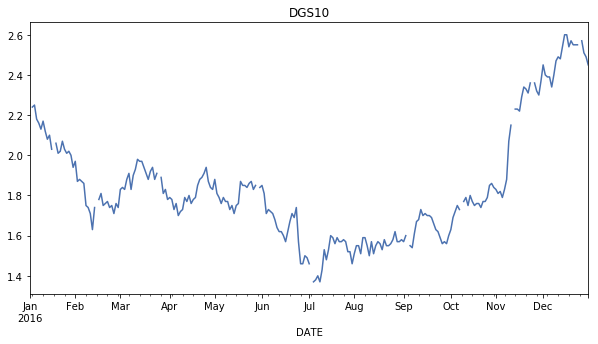

In [8]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Set start and end dates
start = date(2016,1,1)
#end = date.today() # not necessary

# Set the ticker and data_source
ticker = 'DGS10'
data_source = 'fred'

# Import the data using DataReader
dgs10 = DataReader(ticker, data_source, start, end)

# Plot Close
dgs10['DGS10'].plot(title=ticker, figsize=(10,5))

# Show the plot
plt.show()

## Combining stock and economic data
---
### Oil price vs Exxon stock

In [10]:
start = date(2000,1,1)

oil = DataReader('DCOILWTICO', 'fred', start) # West Texas Intermediate Oil Price

ticker = 'XOM' # Exxon Mobile Corporation

stock = DataReader(ticker, 'yahoo', start)

data = pd.concat([stock[['Close']], oil], axis=1) # We concatenate both dataframe horizontally, aligned on the index (date)

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4686 entries, 1999-12-31 to 2017-12-18
Data columns (total 2 columns):
Close         4520 non-null float64
DCOILWTICO    4507 non-null float64
dtypes: float64(2)
memory usage: 109.8 KB


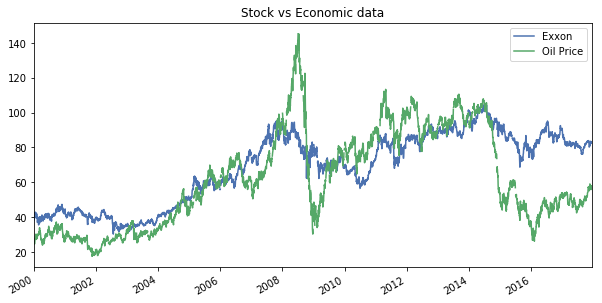

In [11]:
# Let's rename the columns
data.columns = ['Exxon', 'Oil Price']

# Let's plot both columns
data.plot(figsize=(10,5))
plt.legend()
plt.title('Stock vs Economic data')
plt.show()

### Gold Price

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12971 entries, 1968-04-01 to 2017-12-18
Data columns (total 1 columns):
GOLDAMGBD228NLBM    12573 non-null float64
dtypes: float64(1)
memory usage: 202.7 KB


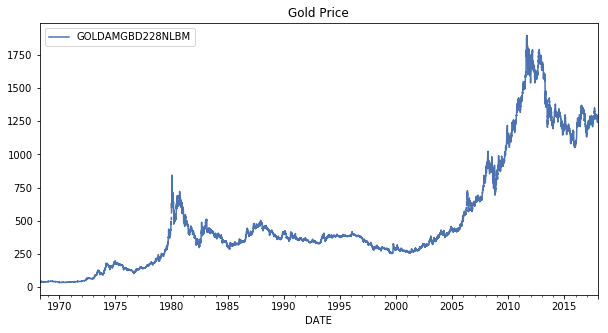

In [12]:
# Set start date
start = date(1968,1,1)

series = 'GOLDAMGBD228NLBM'

# Import the data
gold_price = DataReader(series, 'fred', start=start)

# Inspect the price of gold
gold_price.info()

# Plot the price of gold
gold_price.plot(title='Gold Price', figsize=(10,5))

# Show the plot
plt.show()

### Unemployment Rate vs Labor Market participation
Two economic data series in FRED are the Civilian Unemployment Rate ('UNRATE') and the Civilian Labor Force Participation Rate ('CIVPART').

These rates highlight two important aspects of the US labor market: the share of the civilian population that is currently unemployed or seeking employment, and the share of those active in the labor market that are in fact employed.

This means that the numbers indicate both the size of the labor market relative to the total population, as well as the size of unemployment relative to the labor market.

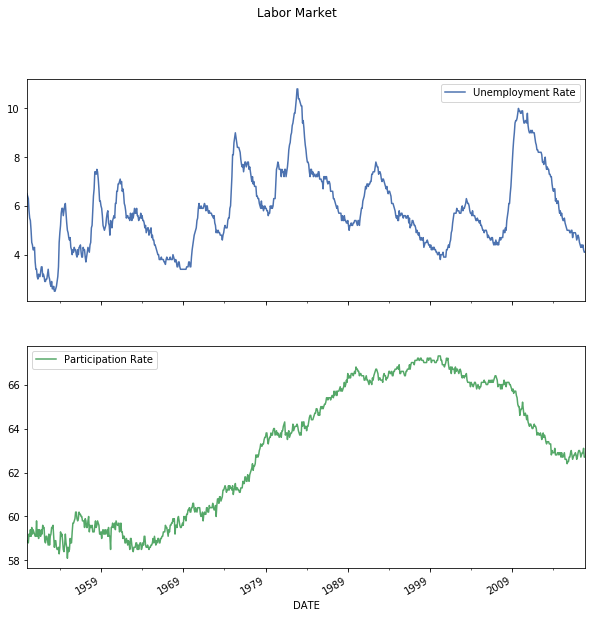

In [13]:
# Set the start date
start = date(1950,1,1)

# Define the series codes
series = ['UNRATE', 'CIVPART']

# Import the data
econ_data = DataReader(series, 'fred', start)

# Assign new column labels
econ_data.columns = ['Unemployment Rate', 'Participation Rate']

# Plot econ_data
econ_data.plot(subplots=True, title='Labor Market', figsize=(10,10))

# Show the plot
plt.show()

### Bond vs Stock performance

For bonds, we'll use the Bank of America Merrill Lynch US High Yield Total Return Index Value ('BAMLHYH0A0HYM2TRIV'). For stocks, we'll use the S&P 500 Index ('SP500'). Both are available for the past 10 years from the Federal Reserve's FRED service.

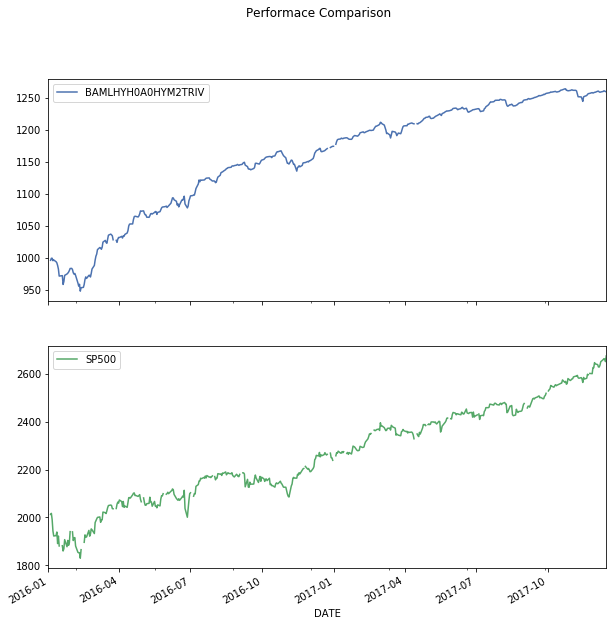

In [14]:
# Import DataReader
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt

# Import date
from datetime import date
# Set the start date
start = date(2016,1,1)

# Set the series code
series = ['BAMLHYH0A0HYM2TRIV', 'SP500']

# Import the data
data = DataReader(series, 'fred', start)

# Plot the results
data.plot(subplots=True, title='Performace Comparison', figsize=(10,10))

# Show the plot
plt.show()

### Largest tech companies with 2017 IPO

We retrieve and plot the close prices and volumes, from the beginning of the year until today, for the company with the largest market capitalization in the Technology sector with an IPO in 2017.

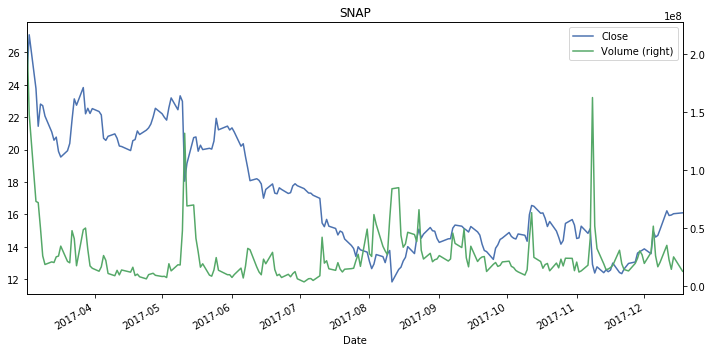

In [15]:
# Import the data
nyse = pd.read_excel('listings.xlsx', sheetname='nyse', na_values='n/a')

# We set the Stock symbol as index
nyse = nyse.set_index('Stock Symbol')

# We set the ticker to the largest tech company with 2017 IPO
ticker = nyse.loc[(nyse.Sector == 'Technology') & (nyse['IPO Year'] == 2017), 'Market Capitalization'].idxmax()
# NB: - The first argument of .loc defines the condition we want to use as filter
#     - The second argument of .loc defines the column with the maximum value for which we want to retrieve the id

# We provide the ticker to the data reader
data = DataReader(ticker, 'yahoo')

# We select the data we want
data = data.loc[:,['Close','Volume']]

# We plot the data
data.plot(title=ticker, secondary_y='Volume', figsize=(10,5))

plt.tight_layout()
plt.show()

Snapchat is the largest tech company with IPO in 2017!

### Largest consumer company since 2012

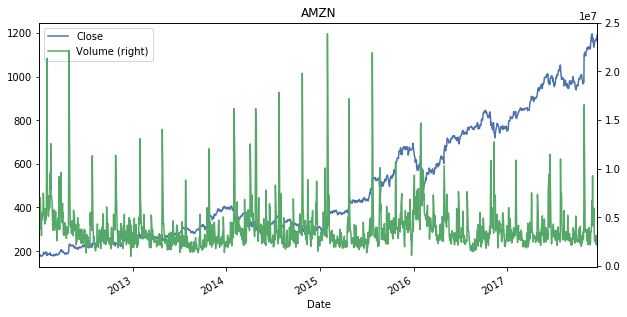

In [16]:
# Set the index of listings to Stock Symbol
listings = combined_listings.set_index('Stock Symbol')

# Get ticker of the largest Consumer Services company
ticker = listings.loc[listings.Sector=='Consumer Services', 'Market Capitalization'].idxmax()

# Set the start date
start = date(2012, 1, 1)

# Import the stock data
data = DataReader(ticker, 'yahoo', start)

# Plot Close and Volume
data[['Close', 'Volume']].plot(secondary_y='Volume', title=ticker, figsize=(10,5))

# Show the plot
plt.show()

As we can see, Amazon is the largest listed consumer services company across all exchanges!

### Largest consumer company after 1998
We here determine the largest consumer company since Amazon went public in 1997.

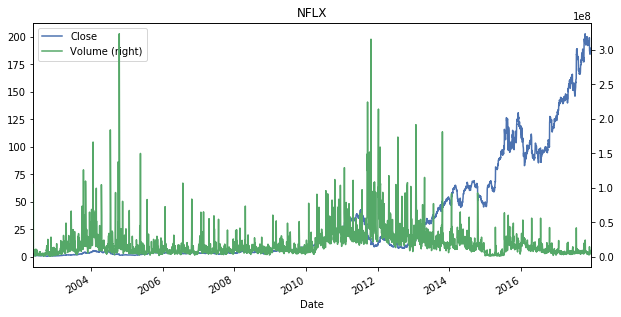

In [17]:
# Get ticker of the largest consumer services company listed after 1997
ticker = listings.loc[(listings.Sector == 'Consumer Services') & (listings['IPO Year'] > 1998), 'Market Capitalization'].idxmax()

# Set the start date
start = date(1998,1,1)

# Import the stock data
data = DataReader(ticker, 'yahoo', start)

# Plot Close and Volume
data[['Close', 'Volume']].plot(secondary_y='Volume', title=ticker, figsize=(10,5))

# Show the plot
plt.show()

After Amazon in 1997, it is Netflix which is the largest consumer company that went public!

## Importing data for several companies using a MultiIndex
---
We can import data for several companies at once using a MultiIndex dataframe.

In [18]:
# Import DataReader
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt

# Import date
from datetime import date

# Set the index of listings to Stock Symbol
listings = combined_listings.set_index('Stock Symbol')

# Get ticker of 3 largest finance companies
top_3_companies = listings.loc[listings.Sector=='Finance','Market Capitalization'].nlargest(n=3)
print(top_3_companies.head())

# Convert index to list
top_3_tickers = top_3_companies.index.tolist()

# Set start date
start = date(2012,1,1)

# Import stock data
data = DataReader(top_3_tickers, 'yahoo', start)
data2 = data.to_frame()

data2.head()

Stock Symbol
JPM    3.002833e+11
WFC    2.569488e+11
BAC    2.236668e+11
Name: Market Capitalization, dtype: float64


Adj Close       Close        High         Low        Open  \
Date       minor                                                               
2017-12-18 BAC     29.389999   29.389999   29.480000   29.270000   29.290001   
           JPM    106.570099  106.570099  107.629997  106.480003  107.190002   
           WFC     60.555000   60.555000   61.119999   60.369999   60.439999   
2017-12-14 BAC     28.730000   28.730000   29.180000   28.709999   29.059999   
           JPM    104.660004  104.660004  106.449997  104.639999  106.120003   

                      Volume  
Date       minor              
2017-12-18 BAC    39988517.0  
           JPM     7355467.0  
           WFC    11511381.0  
2017-12-14 BAC    60492000.0  
           JPM    13017200.0

In [19]:
# Unstack and inspect result
data2.unstack().head()

Adj Close                             Close              \
minor             BAC         JPM        WFC        BAC         JPM   
Date                                                                  
2017-12-18  29.389999  106.570099  60.555000  29.389999  106.570099   
2017-12-14  28.730000  104.660004  59.220001  28.730000  104.660004   
2017-12-13  28.840000  105.510002  59.400002  28.840000  105.510002   
2017-12-12  29.320000  106.849998  60.330002  29.320000  106.849998   
2017-12-11  28.940001  105.620003  58.869999  28.940001  105.620003   

                            High                               Low  \
minor             WFC        BAC         JPM        WFC        BAC   
Date                                                                 
2017-12-18  60.555000  29.480000  107.629997  61.119999  29.270000   
2017-12-14  59.220001  29.180000  106.449997  59.990002  28.709999   
2017-12-13  59.400002  29.440001  107.110001  60.500000  28.830000   
2017-12-12  60.330002  29.500000  107.370003  60.560001  28.910000   
2017-12-11  58.869999  29.170000  106.059998  59.299999  28.900000   

                                        Open                         \
minor              JPM        WFC        BAC         JPM        WFC   
Date                                                                  
2017-12-18  106.480003  60.369999  29.290001  107.190002  60.439999   
2017-12-14  104.639999  59.209999  29.059999  106.120003  59.549999   
2017-12-13  105.480003  59.380001  29.309999  106.699997  60.310001   
2017-12-12  105.540001  58.709999  29.320000  106.910004  58.709999   
2017-12-11  105.309998  58.619999  29.030001  105.720001  58.959999   

                Volume                          
minor              BAC         JPM         WFC  
Date                                            
2017-12-18  39988517.0   7355467.0  11511381.0  
2017-12-14  60492000.0  13017200.0  14673000.0  
2017-12-13  79980600.0  15020300.0  18227000.0  
2017-12-12  76017200.0  15508800.0  25040400.0  
2017-12-11  54001900.0  10591200.0  15876600.0

In [20]:
# Unstacking and retrieve only the Close price for the top 3 companies
# Before :
print(data2['Close'].head())

# After :
data2['Close'].unstack().head()

Date        minor
2017-12-18  BAC       29.389999
            JPM      106.570099
            WFC       60.555000
2017-12-14  BAC       28.730000
            JPM      104.660004
Name: Close, dtype: float64


minor,BAC,JPM,WFC
Date,,,
2017-12-18,29.389999,106.570099,60.555000
2017-12-14,28.730000,104.660004,59.220001
2017-12-13,28.840000,105.510002,59.400002
2017-12-12,29.320000,106.849998,60.330002
2017-12-11,28.940001,105.620003,58.869999


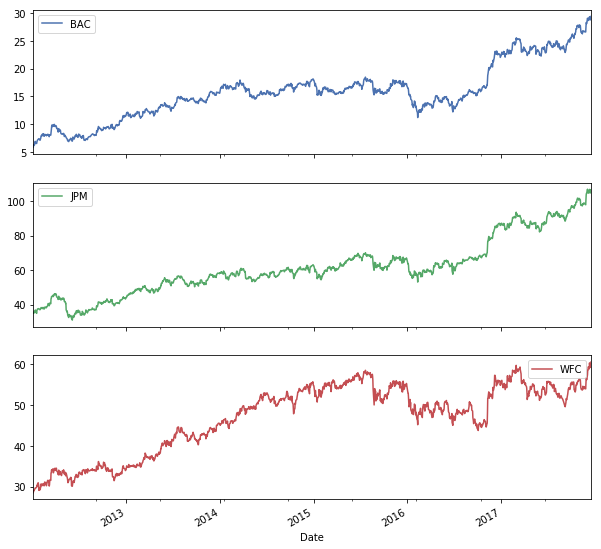

In [21]:
# We plot the data
data2['Close'].unstack().plot(subplots=True, figsize=(10,10))
plt.show()

## Exploratory Data Analysis
---
### Central tendency and dispersion

In [22]:
# Import the data
income = pd.read_csv('per_capita_income.csv')

# Inspect the result
income.info()

# Sort the data by income
income = income.sort_values('Income per Capita', ascending=False)

# Display the first and last five rows
print(income.head())
print(income.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
Country              184 non-null object
Income per Capita    184 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB
               Country  Income per Capita
133              Qatar       141542.66280
97    Macao SAR, China       111496.62940
96          Luxembourg       102051.68030
144          Singapore        85382.30227
23   Brunei Darussalam        78369.29102
                      Country  Income per Capita
121                     Niger         955.483324
94                    Liberia         835.366935
37           Congo, Dem. Rep.         784.365232
26                    Burundi         727.150789
31   Central African Republic         618.752859


As we can see, the countries with the highest per capita income are Qatar, Macao SAR, Luxembourg, Singapore, and Brunei.

In [23]:
# Calculate the mean
print(income['Income per Capita'].mean())

# Calculate the median
print(income['Income per Capita'].median())

# Create the new column
income['Income per Capita (,000)'] = income['Income per Capita'] // 1000

# Calculate the mode of the new column
income['Income per Capita (,000)'].mode()

19469.41956573694
11620.932519999998


0    1.0
dtype: float64

Rounded down to the nearest thousand, the most common value in Income per Capita is 1.0.